<a href="https://colab.research.google.com/github/mohit-lab/Routing-Optimization/blob/main/twitter_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud


In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
from google.colab import files
uploaded = files.upload()

Saving keys.csv to keys.csv


In [52]:
import io
key = pd.read_csv('keys.csv',header = None)
key.set_axis(['name', 'key'], axis=1, inplace=True)
#key

In [6]:
consumer_key = key['key'][0]
consumer_secret = key['key'][1]
access_token =  key['key'][2]
access_token_secret = key['key'][3]

In [7]:
authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret)
authenticate.set_access_token(access_token, access_token_secret)
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [8]:
posts  =api.user_timeline(screen_name = 'BillGates', count = 100, lang = 'en', tweet_mode = 'extended')

In [10]:
print('Show the 5 recent tweets: \n')
i = 1
for tweet in posts[0:5]:
  print(str(i) + ') '+ tweet.full_text + '\n')
  i+=1

Show the 5 recent tweets: 

1) I really enjoyed reading these five books this year, and I think you will too: https://t.co/ClGjkmM3Xh https://t.co/tUsbGopcbH

2) It’s hard to believe that it’s been 50 years since the 4004 kickstarted the PC era. I still remember reading about its release with Paul and dreaming about how the world's first microprocessor might shape the future. https://t.co/7MDhGok7t5

3) About 3.6 billion people—nearly half of the world’s population—lack toilets or use unsafe sanitation. This #WorldToiletDay, I’m optimistic this sanitation crisis can be solved. https://t.co/ILNnK3ZkGA

4) 2021 saw incredible innovation in health and climate. I am excited about many of these advancements and look forward to seeing what’s next. https://t.co/kBGnl5KIq8

5) I love the message in @JohnDoerr’s new book that in order to eliminate the Green Premiums, we need to make a scalable plan now: https://t.co/sOJsZ5GTRE https://t.co/C5UvjbkeiD



In [13]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,I really enjoyed reading these five books this...
1,It’s hard to believe that it’s been 50 years s...
2,About 3.6 billion people—nearly half of the wo...
3,2021 saw incredible innovation in health and c...
4,I love the message in @JohnDoerr’s new book th...


In [14]:
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?:\/\/\S+', '', text)
  return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)
df

,Tweets
0,I really enjoyed reading these five books this...
1,It’s hard to believe that it’s been 50 years s...
2,About 3.6 billion people—nearly half of the wo...
3,2021 saw incredible innovation in health and c...
4,I love the message in ’s new book that in orde...
...,...
95,"When the pandemic hit, many feared the worst w..."
96,Where you live shouldn’t determine whether or ...
97,Even amid the devastation of the COVID-19 pand...
98,This news is not surprising to many of us who ...


In [17]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)

df['Polarity'] = df['Tweets'].apply(getPolarity)

In [18]:
 df

,Tweets,Polarity,Subjectivity
0,I really enjoyed reading these five books this...,0.500000,0.700000
1,It’s hard to believe that it’s been 50 years s...,-0.013889,0.333333
2,About 3.6 billion people—nearly half of the wo...,-0.166667,0.166667
3,2021 saw incredible innovation in health and c...,0.443750,0.537500
4,I love the message in ’s new book that in orde...,0.145455,0.451515
...,...,...,...
95,"When the pandemic hit, many feared the worst w...",-0.208333,0.625000
96,Where you live shouldn’t determine whether or ...,0.136364,0.500000
97,Even amid the devastation of the COVID-19 pand...,0.100000,0.350000
98,This news is not surprising to many of us who ...,0.130000,0.300000


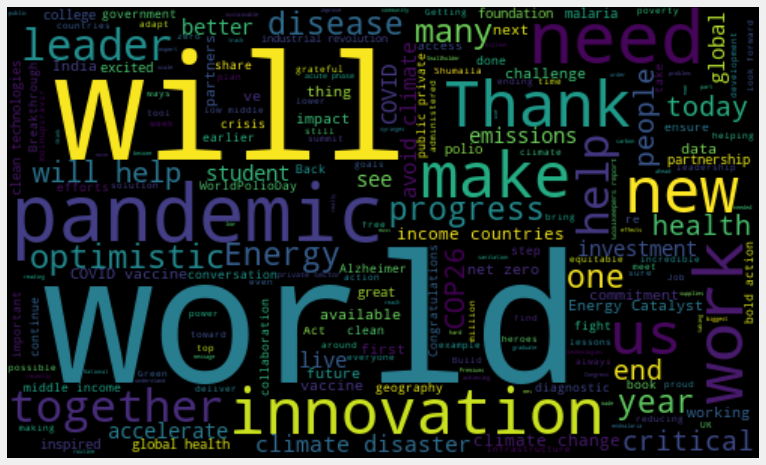

In [31]:
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)
plt.figure(figsize=(12,14))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Polarity,Subjectivity,Analysis
0,I really enjoyed reading these five books this...,0.500000,0.700000,Positive
1,It’s hard to believe that it’s been 50 years s...,-0.013889,0.333333,Negative
2,About 3.6 billion people—nearly half of the wo...,-0.166667,0.166667,Negative
3,2021 saw incredible innovation in health and c...,0.443750,0.537500,Positive
4,I love the message in ’s new book that in orde...,0.145455,0.451515,Positive
...,...,...,...,...
95,"When the pandemic hit, many feared the worst w...",-0.208333,0.625000,Negative
96,Where you live shouldn’t determine whether or ...,0.136364,0.500000,Positive
97,Even amid the devastation of the COVID-19 pand...,0.100000,0.350000,Positive
98,This news is not surprising to many of us who ...,0.130000,0.300000,Positive


In [27]:
df[df['Analysis'] == 'Positive'].sort_values(by=['Polarity'], ascending = False)

,Tweets,Polarity,Subjectivity,Analysis
22,Getting to zero emissions will be the hardest ...,0.800000,0.750000,Positive
79,India is a great example of a country that has...,0.800000,0.750000,Positive
72,"Happy Birthday, President Carter. You set a gr...",0.733333,0.883333,Positive
44,It’s great to see the strong commitment of par...,0.616667,0.741667,Positive
74,Girin Beeharry was an extraordinary leader and...,0.516667,0.800000,Positive
...,...,...,...,...
21,I’m grateful for the leadership of our Energy...,0.044444,0.256944,Positive
31,. Energy Catalyst is bringing together private...,0.041667,0.360417,Positive
35,Encouraged to discuss with PM on the sideline...,0.037500,0.725000,Positive
81,"Thanks for having me on the show, ! And thanks...",0.037500,0.450000,Positive


In [28]:
df[df['Analysis'] == 'Negative'].sort_values(by=['Polarity'], ascending = False)

,Tweets,Polarity,Subjectivity,Analysis
84,More than 80% of COVID-19 vaccines have been a...,-0.001667,0.526667,Negative
1,It’s hard to believe that it’s been 50 years s...,-0.013889,0.333333,Negative
13,To tackle the biggest global health challenges...,-0.031250,0.243750,Negative
40,"At this year’s UN Climate Conference, innovati...",-0.100000,0.100000,Negative
2,About 3.6 billion people—nearly half of the wo...,-0.166667,0.166667,Negative
95,"When the pandemic hit, many feared the worst w...",-0.208333,0.625000,Negative
63,"Still, the disparities in access to the COVID-...",-0.250000,0.650000,Negative
38,In addition to investments in reducing emissio...,-0.300000,0.400000,Negative


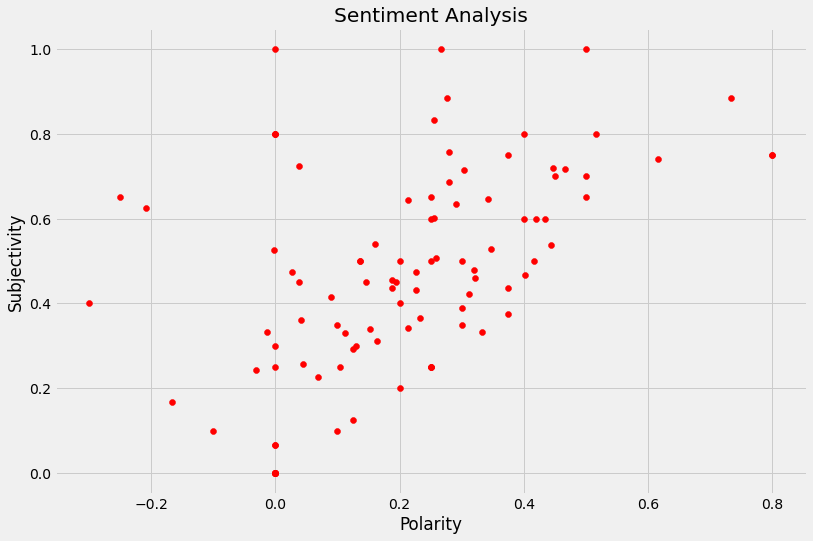

In [36]:
plt.figure(figsize = (12,8))
for i in range (0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'red')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

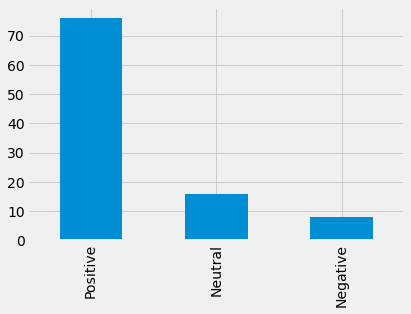

In [51]:
import seaborn as sns
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()